In [35]:
from keras.layers import Conv2D, MaxPooling2D, Flatten,Dense
from keras.models import Sequential
from keras.datasets import mnist
from keras.utils import to_categorical

import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
from keras.preprocessing.image import load_img, array_to_img
from keras.layers import Dense #Dense ensure it will be a fully connnected layer

In [37]:
#pip install keras
#pip install tensorflow

(X_train, y_train), (X_test, y_test) = mnist.load_data() #All images are stored in Train and lebel of that images are in test

In [38]:
print(X_train.shape) # will show 60,000 entries and 28X28 dimension images
print(y_train.shape) # this contains the lebel of each images (eg - pic = 5)
print(X_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [39]:
#Understanding the image data format
X_train[0].shape

(28, 28)

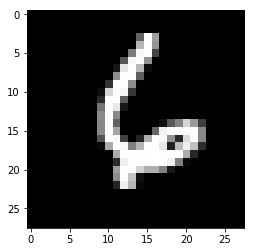

In [40]:
plt.imshow(X_train[59000],cmap='gray')

In [41]:
y_train[59000]

6

In [42]:
#Preprocessing the image data
image_height, image_width = 28,28

In [43]:
28*28 #here the ans 784 is pixel or neuron

784

In [44]:
X_train=X_train.reshape(60000, image_height*image_width) #this give us one layer, 784 neuron accross
X_test=X_test.reshape(10000, image_height*image_width) #we are converting to ensure right format to fit the model

In [45]:
print(X_train.shape)
print(X_test.shape)

(60000, 784)
(10000, 784)


In [46]:
print(X_train[0]) #as the org image is gray scale so the value of original pixel is betweet 0 - 255// change the type to float 
X_train=X_train.astype('float32') #Change the data type to as float
X_test=X_test.astype('float32')

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [47]:
X_train /= 255.0 #Devide each element on the array with 255 where we'll get the value betweet 0 and 1
X_test /= 255.0
print(X_train[0])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

In [56]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [54]:
print(y_train[0])
print(y_test[0])
#print(X_train[0])
#print(X_test[0])

5
7


Note: when using the categorical_crossentropy loss, your targets should be in categorical format (e.g. if you have 10 classes, the target for each sample should be a 10-dimensional vector that is all-zeros except for a 1 at the index corresponding to the class of the sample). In order to convert integer targets into categorical targets, you can use the Keras utility to_categorical [Ref: keras documentation https://keras.io/losses/]

In [55]:
y_train=to_categorical(y_train,10)
y_test=to_categorical(y_test,10)


In [57]:
model =  Sequential()

In [58]:
model.add(Dense(512,activation='relu',input_shape=(784,)))
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [60]:
#Compile the model
model.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy']) #Here we use loss = 'cateogi...' that supports 10 bin output

In [61]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [64]:
784*512+512

401920

In [65]:
512*512+512

262656

In [66]:
512*10+10

5130

In [68]:
hist= model.fit(X_train,y_train, epochs=20, validation_data=(X_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 130s 2ms/step - loss: 0.0137 - acc: 0.9966 - val_loss: 0.1150 - val_acc: 0.9832
Epoch 2/20
60000/60000 [==============================] - 87s 1ms/step - loss: 0.0184 - acc: 0.9963 - val_loss: 0.1411 - val_acc: 0.9810- ETA: 1:29 - loss:  - - ETA: 1:33 - loss: 0.0 - ETA:  - ETA: 14s - los - ETA: 7s - loss: 0.0174 - - ETA: 7s - loss: 0.0177 - acc: 0. - ETA: 6s - loss: 0.0182 - acc: 0.9 - ETA: 6s - loss: 0.0182 - a - ETA: 5s - loss: 0.0182 - acc: 0.996 - ETA: 5s - loss: 0.018 - ETA: 4s - loss: 0.0180 - acc: 0.99 - ETA: 4s - los - ETA: 2s - loss: 0.0180 -  - ETA: 2s - loss: 0.0182 - acc: 0.9 - ETA: 2s - - ETA: 0s - loss: 0.0183 - acc: 0.99
Epoch 3/20
60000/60000 [==============================] - 115s 2ms/step - loss: 0.0121 - acc: 0.9970 - val_loss: 0.1280 - val_acc: 0.98168s - loss: 0. - ETA: 1s - los
Epoch 4/20
60000/60000 [==============================] - 105s 2ms/step - loss: 0.

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.100718). Check your callbacks.
  % delta_t_median)
C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.103211). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 131s 2ms/step - loss: 0.0122 - acc: 0.9971 - val_loss: 0.1734 - val_acc: 0.9782
Epoch 6/20
 1920/60000 [..............................] - ETA: 2:19 - loss: 0.0092 - acc: 0.9984- ETA: 2:14 - loss: 0.0147 - acc: - ETA: 2:05 - loss: 0.0158 - acc:  - ETA: 2:01 - loss: 0.0131 - ac - ETA: 2:14 - loss: 0.0110 - ac

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.106715). Check your callbacks.
  % delta_t_median)


11968/60000 [====>.........................] - ETA: 1:46 - loss: 0.0104 - acc: 0.9978

C:\ProgramData\Anaconda3\lib\site-packages\keras\callbacks.py:120: UserWarning: Method on_batch_end() is slow compared to the batch update (0.101230). Check your callbacks.
  % delta_t_median)


60000/60000 [==============================] - 116s 2ms/step - loss: 0.0121 - acc: 0.9973 - val_loss: 0.1355 - val_acc: 0.98370125 - acc: 0.99 - ETA: 4s - loss: 0.
Epoch 7/20
60000/60000 [==============================] - 96s 2ms/step - loss: 0.0098 - acc: 0.9979 - val_loss: 0.1567 - val_acc: 0.9800 ETA: 1:11 - loss: 0.0074  - ETA: 35s - loss: 0. - ETA - ETA - ETA: 25s - loss: 0.0083 - - ETA: 23s - loss: 0.0086 - acc:  - - ETA: 21s - loss: 0. - ETA: -  - ETA: 5s - loss: 0.0 - ETA: 4s - loss: 0.0098 - acc - ETA - ETA: 1s - loss: 0.0098 - acc: 0. - ETA: 0s - loss: 0.0099 - a
Epoch 8/20
60000/60000 [==============================] - 82s 1ms/step - loss: 0.0129 - acc: 0.9971 - val_loss: 0.1309 - val_acc: 0.9825 13s - loss - ETA: 11s - loss: 0.0138 - acc:  - ETA: 11s - loss: 0. - ETA: 10s - loss:  - ETA: 10s - loss: 0.0138 - acc: 0. - ETA: 9s - loss: 0.0137 - - ETA: 8s - loss: 0.0135 - acc: 0.9 - ETA: 8s - loss: 0.0135 - acc:  - ETA: 8s - loss: 0.0135 - acc: 0. - ETA: 7s - l - ETA: 6s - los

Plot the accuracy of the model

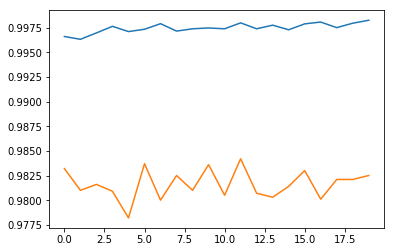

In [72]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])

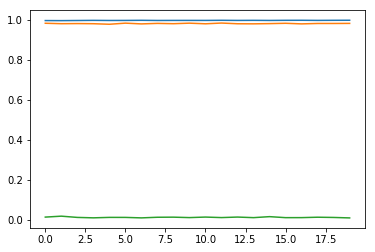

In [73]:
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.plot(hist.history['loss'])

# Evaluating the model

In [74]:
score = model.evaluate(X_test,y_test)

10000/10000 [==============================] - 3s 317us/step


In [75]:
score

[0.16885277307502197, 0.9825]

In [76]:
from keras.models import model_from_json
import numpy
import os
# fix random seed for reproducibility
numpy.random.seed(7)

In [77]:
# evaluate the model
scores = model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))


acc: 98.25%


In [78]:
# serialize model to JSON
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)


In [79]:
# serialize weights to HDF5
model.save_weights("model_nn.h5")
print("Saved model to disk")

Saved model to disk


In [80]:
# load json and create model
json_file = open('model.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)


In [81]:
# load weights into new model
loaded_model.load_weights("model_nn.h5")
print("Loaded model from disk")


Loaded model from disk


In [ ]:

# evaluate loaded model on test data
loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
score = loaded_model.evaluate(X, Y, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

In [82]:

# evaluate loaded model on test data
loaded_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [83]:
score = loaded_model.evaluate(X_test, y_test, verbose=0)
print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))

acc: 98.25%
